In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb

In [2]:


dataset = pd.read_csv('urldata.csv') # have all the features

# we will be using scaled data for these three datasets
# here we have included only the selected features

dataset_1 = pd.read_csv('dataset_1.csv')
dataset_2 = pd.read_csv('dataset_2.csv')
dataset_3 = pd.read_csv('dataset_3.csv')


In [3]:
dataset_1

,QueryLength,UrlLength,NumNumericChars,HostnameLength,NumDots,NumDashInHostname,NumDash,NumAmpersand,SubdomainLevel,RandomString,NumQueryComponents,NumPercent,PathLevel,IpAddress,NumUnderscore,Label
0,0,30,0,14,3,0,0,0,4,0,0,0,3,0,0,0
1,39,96,15,10,2,0,4,0,3,1,1,0,5,0,0,0
2,0,36,0,21,2,0,0,0,3,0,0,0,2,0,0,0
3,35,79,7,28,3,1,6,0,4,0,0,0,2,0,0,0
4,0,35,0,10,1,1,1,0,2,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,26,0,13,2,0,0,0,3,0,0,0,2,0,0,1
9996,0,17,13,4,3,0,0,0,1,0,0,0,1,1,0,1
9997,0,34,0,15,2,0,0,0,3,0,0,0,2,0,1,1
9998,0,17,0,8,1,0,0,0,2,0,0,0,2,0,0,1


## Creating Models Using All of the 25 Features

In [4]:
target = dataset['Label']
features = dataset.drop(['Label'], axis=1)

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### - Without Scaling

In [7]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
gnb_model = GaussianNB()

In [8]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)

C:\Users\admi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [9]:
# Making predictions
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
gnb_pred = gnb_model.predict(X_test)

In [10]:
# Evaluating the models
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [11]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.813
Decision Tree Accuracy: 0.7785
Random Forest Accuracy: 0.8145
Logistic Regression Accuracy: 0.709
Gradient Boosting Accuracy: 0.782
AdaBoost Accuracy: 0.767
SVM Accuracy: 0.687
GaussianNB Accuracy: 0.664


### - With Scaling

In [12]:
lr_model_scaled = LogisticRegression()
dt_model_scaled = DecisionTreeClassifier()
rf_model_scaled = RandomForestClassifier()
xgb_model_scaled = xgb.XGBClassifier()
gb_model_scaled = GradientBoostingClassifier()
ab_model_scaled = AdaBoostClassifier()
svm_model_scaled = SVC()
knn_model_scaled = KNeighborsClassifier()
gnb_model_scaled = GaussianNB()

In [13]:
lr_model_scaled.fit(X_train_scaled, y_train)
dt_model_scaled.fit(X_train_scaled, y_train)
rf_model_scaled.fit(X_train_scaled, y_train)
xgb_model_scaled.fit(X_train_scaled, y_train)
gb_model_scaled.fit(X_train_scaled, y_train)
ab_model_scaled.fit(X_train_scaled, y_train)
svm_model_scaled.fit(X_train_scaled, y_train)
knn_model_scaled.fit(X_train_scaled, y_train)
gnb_model_scaled.fit(X_train_scaled, y_train)

GaussianNB()

In [14]:
lr_pred_scaled = lr_model_scaled.predict(X_test_scaled)
dt_pred_scaled = dt_model_scaled.predict(X_test_scaled)
rf_pred_scaled = rf_model_scaled.predict(X_test_scaled)
xgb_pred_scaled = xgb_model_scaled.predict(X_test_scaled)
gb_pred_scaled = gb_model_scaled.predict(X_test_scaled)
ab_pred_scaled = ab_model_scaled.predict(X_test_scaled)
svm_pred_scaled = svm_model_scaled.predict(X_test_scaled)
knn_pred_scaled = knn_model_scaled.predict(X_test_scaled)
gnb_pred_scaled = gnb_model_scaled.predict(X_test_scaled)

In [15]:
# Evaluating the models
lr_accuracy_scaled = accuracy_score(y_test, lr_pred_scaled)
dt_accuracy_scaled = accuracy_score(y_test, dt_pred_scaled)
rf_accuracy_scaled = accuracy_score(y_test, rf_pred_scaled)
xgb_accuracy_scaled = accuracy_score(y_test, xgb_pred_scaled)
gb_accuracy_scaled = accuracy_score(y_test, gb_pred_scaled)
ab_accuracy_scaled = accuracy_score(y_test, ab_pred_scaled)
svm_accuracy_scaled = accuracy_score(y_test, svm_pred_scaled)
knn_accuracy_scaled = accuracy_score(y_test, knn_pred_scaled)
gnb_accuracy_scaled = accuracy_score(y_test, gnb_pred_scaled)

In [16]:
print("XGBoost Accuracy:", xgb_accuracy_scaled)
print("Decision Tree Accuracy:", dt_accuracy_scaled)
print("Random Forest Accuracy:", rf_accuracy_scaled)
print("Logistic Regression Accuracy:", lr_accuracy_scaled)
print("Gradient Boosting Accuracy:", gb_accuracy_scaled)
print("AdaBoost Accuracy:", ab_accuracy_scaled)
print("SVM Accuracy:", svm_accuracy_scaled)
print("KNN Accuracy:", knn_accuracy_scaled)
print("GaussianNB Accuracy:", gnb_accuracy_scaled)

XGBoost Accuracy: 0.813
Decision Tree Accuracy: 0.776
Random Forest Accuracy: 0.812
Logistic Regression Accuracy: 0.71
Gradient Boosting Accuracy: 0.782
AdaBoost Accuracy: 0.767
SVM Accuracy: 0.7175
KNN Accuracy: 0.7975
GaussianNB Accuracy: 0.6445


## Creating Models with Selected Features

### 1. Univariate Feature Selection 

In [17]:
target_1 = dataset_1['Label']
features_1 = dataset_1.drop(['Label'], axis=1)

In [18]:
# Splitting the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler_1 = MinMaxScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

In [20]:
lr_model_1 = LogisticRegression()
dt_model_1 = DecisionTreeClassifier()
rf_model_1 = RandomForestClassifier()
xgb_model_1 = xgb.XGBClassifier()
gb_model_1 = GradientBoostingClassifier()
ab_model_1 = AdaBoostClassifier()
svm_model_1 = SVC()
knn_model_1 = KNeighborsClassifier()
gnb_model_1 = GaussianNB()

In [21]:
lr_model_1.fit(X_train_scaled_1, y_train)
dt_model_1.fit(X_train_scaled_1, y_train)
rf_model_1.fit(X_train_scaled_1, y_train)
xgb_model_1.fit(X_train_scaled_1, y_train)
gb_model_1.fit(X_train_scaled_1, y_train)
ab_model_1.fit(X_train_scaled_1, y_train)
svm_model_1.fit(X_train_scaled_1, y_train)
knn_model_1.fit(X_train_scaled_1, y_train)
gnb_model_1.fit(X_train_scaled_1, y_train)

GaussianNB()

In [22]:
# Making predictions
lr_pred_1 = lr_model_1.predict(X_test_scaled_1)
dt_pred_1 = dt_model_1.predict(X_test_scaled_1)
rf_pred_1 = rf_model_1.predict(X_test_scaled_1)
xgb_pred_1 = xgb_model_1.predict(X_test_scaled_1)
gb_pred_1 = gb_model_1.predict(X_test_scaled_1)
ab_pred_1 = ab_model_1.predict(X_test_scaled_1)
svm_pred_1 = svm_model_1.predict(X_test_scaled_1)
knn_pred_1 = knn_model_1.predict(X_test_scaled_1)
gnb_pred_1 = gnb_model_1.predict(X_test_scaled_1)

In [23]:
# Evaluating the models
lr_accuracy_1 = accuracy_score(y_test, lr_pred_1)
dt_accuracy_1 = accuracy_score(y_test, dt_pred_1)
rf_accuracy_1 = accuracy_score(y_test, rf_pred_1)
xgb_accuracy_1 = accuracy_score(y_test, xgb_pred_1)
gb_accuracy_1 = accuracy_score(y_test, gb_pred_1)
ab_accuracy_1 = accuracy_score(y_test, ab_pred_1)
svm_accuracy_1 = accuracy_score(y_test, svm_pred_1)
knn_accuracy_1 = accuracy_score(y_test, knn_pred_1)
gnb_accuracy_1 = accuracy_score(y_test, gnb_pred_1)

In [24]:
print("XGBoost Accuracy:", xgb_accuracy_1)
print("Decision Tree Accuracy:", dt_accuracy_1)
print("Random Forest Accuracy:", rf_accuracy_1)
print("Logistic Regression Accuracy:", lr_accuracy_1)
print("Gradient Boosting Accuracy:", gb_accuracy_1)
print("AdaBoost Accuracy:", ab_accuracy_1)
print("SVM Accuracy:", svm_accuracy_1)
print("KNN Accuracy:", knn_accuracy_1)
print("GaussianNB Accuracy:", gnb_accuracy_1)

XGBoost Accuracy: 0.798
Decision Tree Accuracy: 0.7765
Random Forest Accuracy: 0.8035
Logistic Regression Accuracy: 0.693
Gradient Boosting Accuracy: 0.769
AdaBoost Accuracy: 0.7375
SVM Accuracy: 0.725
KNN Accuracy: 0.7845
GaussianNB Accuracy: 0.6605


### 2. Using ExtraTrees Classifier

In [25]:
target_2 = dataset_2['Label']
features_2 = dataset_2.drop(['Label'], axis=1)

In [26]:
# Splitting the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler_2 = MinMaxScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [28]:
lr_model_2 = LogisticRegression()
dt_model_2 = DecisionTreeClassifier()
rf_model_2 = RandomForestClassifier()
xgb_model_2 = xgb.XGBClassifier()
gb_model_2 = GradientBoostingClassifier()
ab_model_2 = AdaBoostClassifier()
svm_model_2 = SVC()
knn_model_2 = KNeighborsClassifier()
gnb_model_2 = GaussianNB()

In [29]:
lr_model_2.fit(X_train_scaled_2, y_train)
dt_model_2.fit(X_train_scaled_2, y_train)
rf_model_2.fit(X_train_scaled_2, y_train)
xgb_model_2.fit(X_train_scaled_2, y_train)
gb_model_2.fit(X_train_scaled_2, y_train)
ab_model_2.fit(X_train_scaled_2, y_train)
svm_model_2.fit(X_train_scaled_2, y_train)
knn_model_2.fit(X_train_scaled_2, y_train)
gnb_model_2.fit(X_train_scaled_2, y_train)

GaussianNB()

In [30]:
# Making predictions
lr_pred_2 = lr_model_2.predict(X_test_scaled_2)
dt_pred_2 = dt_model_2.predict(X_test_scaled_2)
rf_pred_2 = rf_model_2.predict(X_test_scaled_2)
xgb_pred_2 = xgb_model_2.predict(X_test_scaled_2)
gb_pred_2 = gb_model_2.predict(X_test_scaled_2)
ab_pred_2 = ab_model_2.predict(X_test_scaled_2)
svm_pred_2 = svm_model_2.predict(X_test_scaled_2)
knn_pred_2 = knn_model_2.predict(X_test_scaled_2)
gnb_pred_2 = gnb_model_2.predict(X_test_scaled_2)

In [31]:
# Evaluating the models
lr_accuracy_2 = accuracy_score(y_test, lr_pred_2)
dt_accuracy_2 = accuracy_score(y_test, dt_pred_2)
rf_accuracy_2 = accuracy_score(y_test, rf_pred_2)
xgb_accuracy_2 = accuracy_score(y_test, xgb_pred_2)
gb_accuracy_2 = accuracy_score(y_test, gb_pred_2)
ab_accuracy_2 = accuracy_score(y_test, ab_pred_2)
svm_accuracy_2 = accuracy_score(y_test, svm_pred_2)
knn_accuracy_2 = accuracy_score(y_test, knn_pred_2)
gnb_accuracy_2 = accuracy_score(y_test, gnb_pred_2)

In [32]:
print("XGBoost Accuracy:", xgb_accuracy_2)
print("Decision Tree Accuracy:", dt_accuracy_2)
print("Random Forest Accuracy:", rf_accuracy_2)
print("Logistic Regression Accuracy:", lr_accuracy_2)
print("Gradient Boosting Accuracy:", gb_accuracy_2)
print("AdaBoost Accuracy:", ab_accuracy_2)
print("SVM Accuracy:", svm_accuracy_2)
print("KNN Accuracy:", knn_accuracy_2)
print("GaussianNB Accuracy:", gnb_accuracy_2)

XGBoost Accuracy: 0.8095
Decision Tree Accuracy: 0.775
Random Forest Accuracy: 0.8105
Logistic Regression Accuracy: 0.703
Gradient Boosting Accuracy: 0.779
AdaBoost Accuracy: 0.7595
SVM Accuracy: 0.709
KNN Accuracy: 0.7865
GaussianNB Accuracy: 0.6645


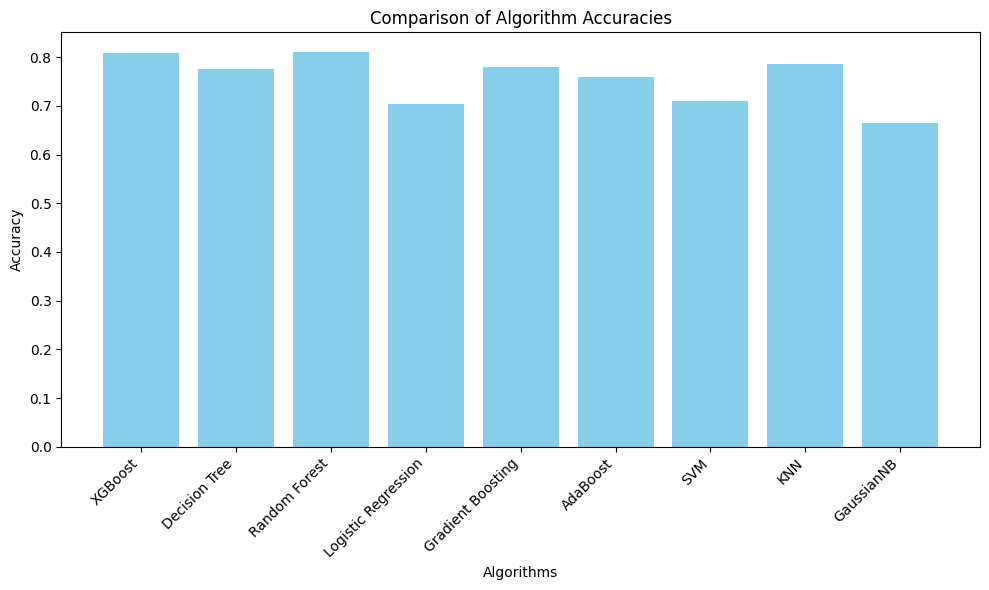

In [33]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding accuracies
algorithms = ["XGBoost", "Decision Tree", "Random Forest", "Logistic Regression", 
              "Gradient Boosting", "AdaBoost", "SVM", "KNN", "GaussianNB"]
accuracies = [xgb_accuracy_2, dt_accuracy_2, rf_accuracy_2, lr_accuracy_2,
              gb_accuracy_2, ab_accuracy_2, svm_accuracy_2, knn_accuracy_2, gnb_accuracy_2]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [34]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_scaled_2, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.798 (0.011)


In [35]:
## stacking algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split


estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=20)),
    ('xgb', xgb.XGBClassifier()),
    ('knn', make_pipeline(MinMaxScaler(), KNeighborsClassifier()))
]

stacking_model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

stacking_model.fit(X_train_scaled_2, y_train_2)

stacking_pred = stacking_model.predict(X_test_scaled_2)
stacking_accuracy = accuracy_score(y_test_2, stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Stacking Classifier Accuracy: 0.82


### 3. Using Mutual Information Classifier

In [36]:
target_3 = dataset_3['Label']
features_3 = dataset_3.drop(['Label'], axis=1)

In [37]:
# Splitting the data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(features_3, target_3, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler_3 = MinMaxScaler()
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)

In [39]:
lr_model_3 = LogisticRegression()
dt_model_3 = DecisionTreeClassifier()
rf_model_3 = RandomForestClassifier()
xgb_model_3 = xgb.XGBClassifier()
gb_model_3 = GradientBoostingClassifier()
ab_model_3 = AdaBoostClassifier()
svm_model_3 = SVC()
knn_model_3 = KNeighborsClassifier()
gnb_model_3 = GaussianNB()

In [40]:
lr_model_3.fit(X_train_scaled_3, y_train)
dt_model_3.fit(X_train_scaled_3, y_train)
rf_model_3.fit(X_train_scaled_3, y_train)
xgb_model_3.fit(X_train_scaled_3, y_train)
gb_model_3.fit(X_train_scaled_3, y_train)
ab_model_3.fit(X_train_scaled_3, y_train)
svm_model_3.fit(X_train_scaled_3, y_train)
knn_model_3.fit(X_train_scaled_3, y_train)
gnb_model_3.fit(X_train_scaled_3, y_train)

GaussianNB()

In [41]:
# Making predictions
lr_pred_3 = lr_model_3.predict(X_test_scaled_3)
dt_pred_3 = dt_model_3.predict(X_test_scaled_3)
rf_pred_3 = rf_model_3.predict(X_test_scaled_3)
xgb_pred_3 = xgb_model_3.predict(X_test_scaled_3)
gb_pred_3 = gb_model_3.predict(X_test_scaled_3)
ab_pred_3 = ab_model_3.predict(X_test_scaled_3)
svm_pred_3 = svm_model_3.predict(X_test_scaled_3)
knn_pred_3 = knn_model_3.predict(X_test_scaled_3)
gnb_pred_3 = gnb_model_3.predict(X_test_scaled_3)

In [42]:
# Evaluating the models
lr_accuracy_3 = accuracy_score(y_test, lr_pred_3)
dt_accuracy_3 = accuracy_score(y_test, dt_pred_3)
rf_accuracy_3 = accuracy_score(y_test, rf_pred_3)
xgb_accuracy_3 = accuracy_score(y_test, xgb_pred_3)
gb_accuracy_3 = accuracy_score(y_test, gb_pred_3)
ab_accuracy_3 = accuracy_score(y_test, ab_pred_3)
svm_accuracy_3 = accuracy_score(y_test, svm_pred_3)
knn_accuracy_3 = accuracy_score(y_test, knn_pred_3)
gnb_accuracy_3 = accuracy_score(y_test, gnb_pred_3)

In [43]:
print("XGBoost Accuracy:", xgb_accuracy_3)
print("Decision Tree Accuracy:", dt_accuracy_3)
print("Random Forest Accuracy:", rf_accuracy_3)
print("Logistic Regression Accuracy:", lr_accuracy_3)
print("Gradient Boosting Accuracy:", gb_accuracy_3)
print("AdaBoost Accuracy:", ab_accuracy_3)
print("SVM Accuracy:", svm_accuracy_3)
print("KNN Accuracy:", knn_accuracy_3)
print("GaussianNB Accuracy:", gnb_accuracy_3)

XGBoost Accuracy: 0.793
Decision Tree Accuracy: 0.7775
Random Forest Accuracy: 0.811
Logistic Regression Accuracy: 0.693
Gradient Boosting Accuracy: 0.7715
AdaBoost Accuracy: 0.7265
SVM Accuracy: 0.7235
KNN Accuracy: 0.785
GaussianNB Accuracy: 0.6525
